**Import Libraries**

In [1]:
from google.colab import drive
from google.colab import files
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

**Import Data**

In [2]:
drive.mount('/content/drive')

data_dir = "/content/drive/My Drive/FYP/midland/"

Mounted at /content/drive


In [4]:
hk_island = [
  "Chai_wan", "Heng_fa_chuen", "Shau_kei_wan", "Sai_wan_ho_tai_koo", "Quarry_bay", "North_point_fortress_hill", 
  "Braemar_hill_north_point_mid_level", "Jardines_lookout_tai_hang", "Happy_valley_mid_level_east", "Wan_chai_causeway_bay", 
  "Tin_hau", "Central_mid_level_admiralty", "Sheung_wan_central", "Hong_kong_west", "Western_mid_levels", "The_peak", 
  "Residence_bel_air_pokfulam", "Ap_lei_chau", "Aberdeen_wong_chuk_hang", "Repulse_bay_shou_son_hill", "Tai_tam_shek_o", "Stanley"
]

kowloon = [
  "Tsim_sha_tsui", "Kowloon_station", "Yau_ma_tei", "Kingspark", "Mongkok", "Tai_kok_tsui", "Olympic", "Lai_chi_kok", "Mei_foo", 
  "Cheung_sha_wan_sham_shui_po", "Yau_yat_tsuen", "Kowloon_tong_beacon_hill", "Ho_man_tin", "Hung_hum", "To_kwa_wan", "Kai_tak", 
  "Kowloon_city", "Wong_tai_sin_lok_fu", "Diamond_hill_san_po_kong_ngau_chi_wan", "Kowloon_bay", "Kwun_tong", "Lam_tin_yau_tong", 
  "Lohas_park", "Tiu_keng_leng", "Hang_hau", "Po_lam_tseung_kwan_o_station"
]

new_territory = [
  "Sai_kung_clear_water_bay", "Shatin", "Kau_to_shan_fotan", "Ma_on_shan", "Tai_po", "North", "Sheung_shui_fanling", "Hung_shui_kiu", 
  "Fairview_palm_springs_the_vineyard", "Tin_shui_wai", "Yuen_long", "Tuen_mun", "Tsuen_wan", "Sham_tseng", "Ma_wan", "Kwai_chung", 
  "Tsing_yi", "Discovery_bay", "Tung_chung", "Lan_tau_island"
]


In [59]:
# Data directory
dir_hk_island = "./hk_island/"
dir_kowloon = "./kowloon/"
dir_new_territory = "./new_territory/"

def get_data_by_region(region_name, disctrict_dir):

  region_df = pd.DataFrame()
  for region in region_name:
    new_df = pd.read_csv(data_dir+disctrict_dir+region+".csv")
    region_df = pd.concat([region_df, new_df], axis=0)

  # Data cleaning
  region_df = region_df.drop(region_df.columns[0], axis=1)

  region_df['tx_date'] = pd.to_datetime(region_df['tx_date'], dayfirst=True)
  region_df['first_op_date'] = pd.to_datetime(region_df['first_op_date'], dayfirst=True)
  region_df['last_tx_date'] = pd.to_datetime(region_df['last_tx_date'], dayfirst=True)

  region_df['floor'] = region_df['floor'].replace("-", np.nan)
  region_df['flat'] = region_df['flat'].replace("-", np.nan)

  region_df['area'] = region_df['area'].replace(0, np.nan)
  region_df['net_area'] = region_df['net_area'].replace(0, np.nan)
  region_df['last_price'] = region_df['last_price'].replace(0, np.nan)
  region_df['floor'] = region_df['floor'].astype('str') 
  region_df = region_df[~region_df['floor'].str.contains("&") == True]
  region_df['floor'] = region_df['floor'].replace("G", 0).replace("LG", 0).replace("LG1", 0)
  region_df['floor'] = region_df['floor'].apply(pd.to_numeric, errors = 'coerce')

  region_df.sort_values(by=['tx_date'], inplace=True, ascending=False)

  region_df = region_df.reset_index()
  region_df = region_df.drop(['index'], axis=1)

  region_df.columns = ['region', 'subregion', 'district', 'estate', 'building', 'firstOpDate',
                      'floorL', 'bedroom', 'sittingroom', 'floor', 'flat', 'grossArea', 'saleableArea',
                      'price', 'regDate', 'lastRegDate', 'lastPrice', 'gain', 'lat', 'lon']
  return region_df

# Get data by region
data_df_hk_island = get_data_by_region(hk_island, dir_hk_island)
data_df_kowloon = get_data_by_region(kowloon, dir_kowloon)
data_df_new_territory = get_data_by_region(new_territory, dir_new_territory)

# Get all region data
data_df_all = pd.concat([data_df_hk_island, data_df_kowloon, data_df_new_territory], axis=0)
data_df_all.sort_values(by=['regDate'], inplace=True, ascending=False)
data_df_all = data_df_all.reset_index()
data_df_all = data_df_all.drop(['index'], axis=1)

**House price Distribution over different regions**

In [33]:
# Price distribution
price_hk_island = data_df_hk_island['price'] / 1000000
price_kowloon = data_df_kowloon['price'] / 1000000
price_new_territory = data_df_new_territory['price'] / 1000000

print("Price distribution in HK Island (million HKD):")
print(price_hk_island.describe())
print("\nPrice distribution in Kowloon (million HKD):")
print(price_kowloon.describe())
print("\nPrice distribution in New Territory (million HKD):")
print(price_new_territory.describe())

Price distribution in HK Island (million HKD):
count    28309.000000
mean        12.703291
std         25.510632
min          0.888250
25%          5.930000
50%          8.100000
75%         12.300000
max       1399.000000
Name: price, dtype: float64

Price distribution in Kowloon (million HKD):
count    61882.000000
mean         9.090426
std          9.329125
min          0.550000
25%          5.300000
50%          7.350650
75%          9.800000
max        370.000000
Name: price, dtype: float64

Price distribution in New Territory (million HKD):
count    76218.000000
mean         7.842068
std          7.509727
min          0.950000
25%          4.984675
50%          6.124950
75%          8.350000
max        269.034000
Name: price, dtype: float64


**Feature Engineering**

In [54]:
def removeOutlier(outliers_removed_df, col):
  # Calculate mean and standard deviation
  data_mean, data_std = np.mean(outliers_removed_df[col]), np.std(outliers_removed_df[col])
  # Calculate upper boundary
  upper = data_mean + data_std * 3

  # Remove outliers
  outliers_removed_df = outliers_removed_df[outliers_removed_df[col] < upper]

  return outliers_removed_df

In [69]:
def feature_engineering(processed_df):
  # Make new features
  processed_df['buildingAge'] = pd.to_datetime("today").year - pd.DatetimeIndex(processed_df['firstOpDate']).year
  processed_df['month'] = pd.to_datetime(processed_df['regDate']).dt.month
  processed_df['year'] = pd.to_datetime(processed_df['regDate']).dt.year
  processed_df['monthYear'] = pd.to_datetime(processed_df['regDate']).dt.to_period('M')

  # Drop unneccessary columns and columns with too many missing values
  processed_df = processed_df.drop(['firstOpDate', 'lastRegDate', 'sittingroom'], axis=1) 

  # Fill missing values with 0
  processed_df['floorL'] = processed_df['floorL'].fillna('Unknown')
  processed_df['lat'] = processed_df['lat'].fillna(0)
  processed_df['lon'] = processed_df['lon'].fillna(0)

  # Fill missing values wiith mean values
  bedroom_mean = processed_df['bedroom'].mean()
  processed_df['bedroom'] = processed_df['bedroom'].fillna(bedroom_mean)
  processed_df['bedroom'] = processed_df['bedroom'].astype(int)

  saleableArea_mean = processed_df['grossArea'].mean()
  processed_df['grossArea'] = processed_df['grossArea'].fillna(saleableArea_mean)

  saleableArea_mean = processed_df['saleableArea'].mean()
  processed_df['saleableArea'] = processed_df['saleableArea'].fillna(saleableArea_mean)

  saleableArea_mean = processed_df['lastPrice'].mean()
  processed_df['lastPrice'] = processed_df['lastPrice'].fillna(saleableArea_mean)

  buildingAge_mean = processed_df['buildingAge'].mean()
  processed_df['buildingAge'] = processed_df['buildingAge'].fillna(buildingAge_mean)
  processed_df['buildingAge'] = processed_df['buildingAge'].astype(int)

  floor_mean = processed_df['floor'].mean()
  processed_df['floor'] = processed_df['floor'].fillna(floor_mean)
  processed_df['floor'] = processed_df['floor'].astype(int)

  # Remove outliers
  processed_df = removeOutlier(processed_df, 'price')
  processed_df = removeOutlier(processed_df, 'grossArea')
  processed_df = removeOutlier(processed_df, 'saleableArea')

  return processed_df

processed_df_all = feature_engineering(data_df_all)
processed_df_hk_island = feature_engineering(data_df_hk_island)
processed_df_kowloon = feature_engineering(data_df_kowloon)
processed_df_new_territory = feature_engineering(data_df_new_territory)

In [70]:
def label_encoding(processed_df):
  cols = ('region', 'subregion', 'district', 'estate', 'building', 
          'floorL', 'flat', 'monthYear')
  for col in cols:
      le = LabelEncoder() 
      le.fit(list(processed_df[col].values)) 
      processed_df[col] = le.transform(list(processed_df[col].values))

  return processed_df

processed_df_hk_island = label_encoding(processed_df_hk_island)
processed_df_kowloon = label_encoding(processed_df_kowloon)
processed_df_new_territory = label_encoding(processed_df_new_territory)

**House price distribution over different regions**

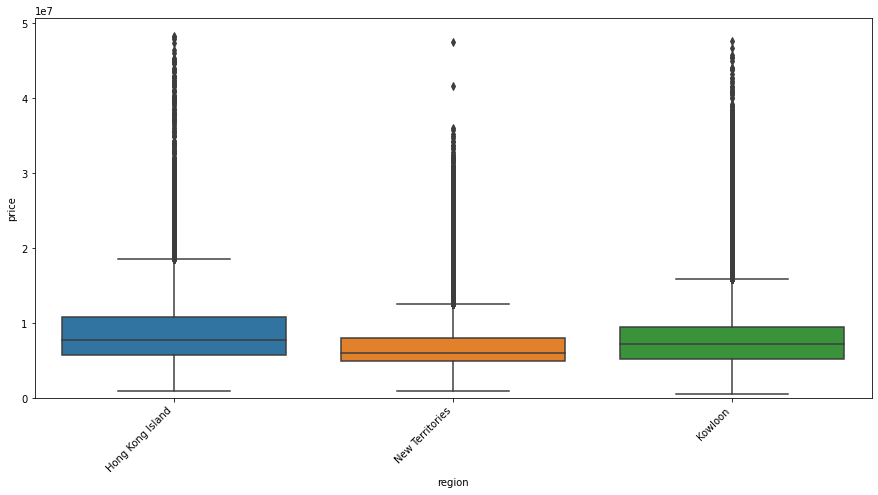

In [39]:
#box plot overallqual/saleprice
var = 'region'
data = pd.concat([processed_df_all['price'], processed_df_all[var]], axis=1)
plt.subplots(figsize=(15, 7))
fig = sns.boxplot(x=var, y="price", data=data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontsize='medium'
                 )
fig.axis(ymin=0);

**House price distribution over different districts**

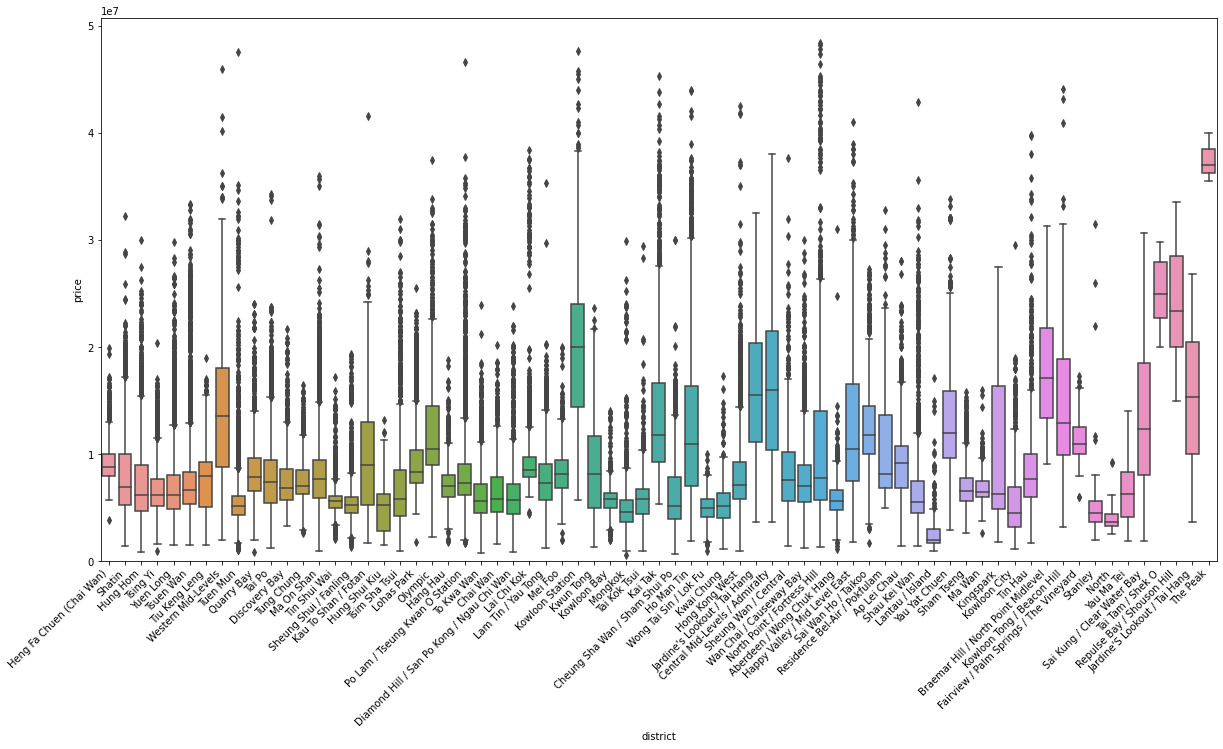

In [80]:
#box plot overallqual/saleprice
var = 'district'
data = pd.concat([processed_df_all['price'], processed_df_all[var]], axis=1)
plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontsize='medium'
                 )
fig.axis(ymin=0);

**Correlation Matrix and Heatmap**

**HK Island**

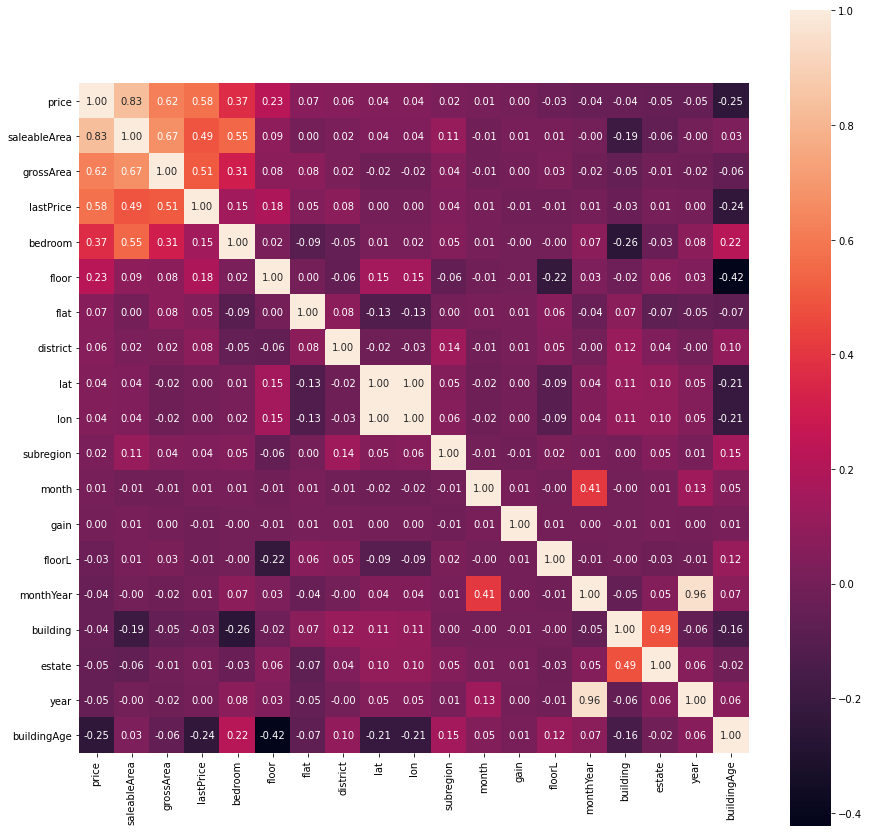

In [71]:
df = processed_df_hk_island.copy()
corrmat = df.corr()

k = 20
fig, ax = plt.subplots(figsize=(15,15)) 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

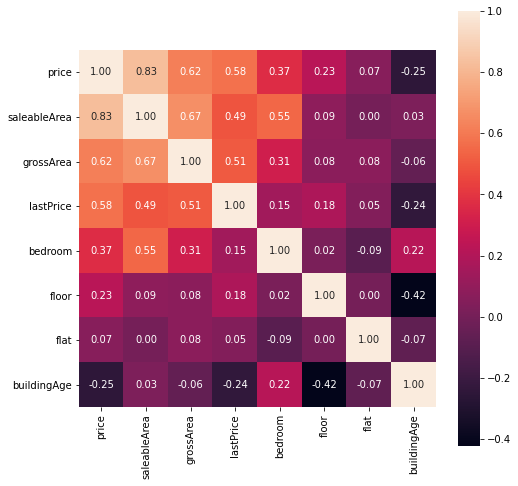

In [74]:
top_7_df = processed_df_hk_island.copy()

top_7_df = top_7_df.drop(['year', 'building', 'lat', 'lon', 'month', 'estate', 'monthYear', 'gain', 'year', 'floorL', 'district', 'subregion', 'regDate'], axis=1) 

corrmat = top_7_df.corr()

k = 8
fig, ax = plt.subplots(figsize=(8,8)) 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(top_7_df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Kowloon**

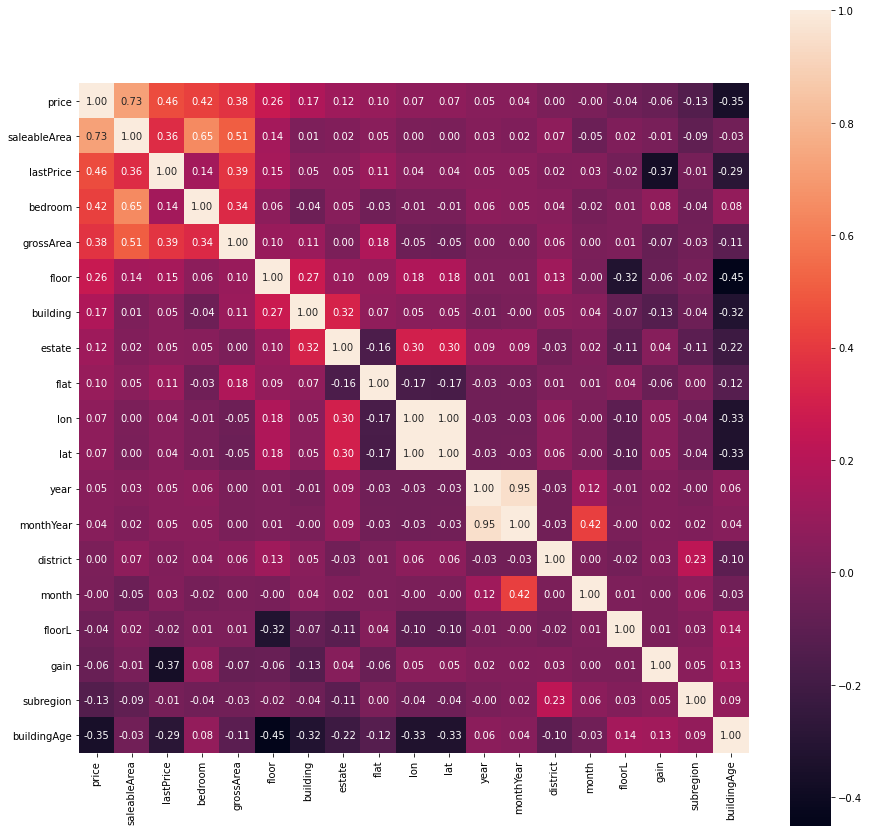

In [72]:
df = processed_df_kowloon.copy()
corrmat = df.corr()

k = 20
fig, ax = plt.subplots(figsize=(15,15)) 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

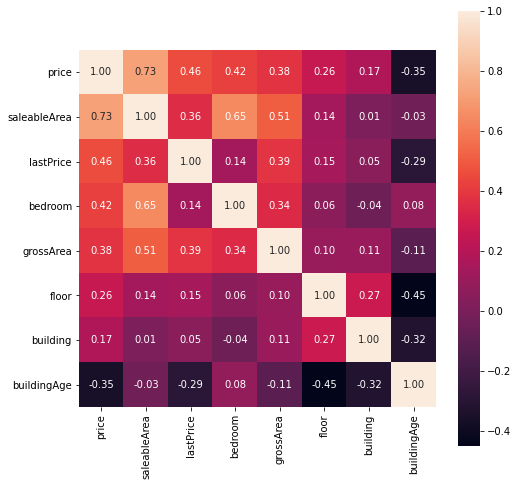

In [75]:
top_7_df = processed_df_kowloon.copy()

top_7_df = top_7_df.drop(['year', 'flat', 'lat', 'lon', 'month', 'estate', 'monthYear', 'gain', 'year', 'floorL', 'district', 'subregion', 'regDate'], axis=1) 

corrmat = top_7_df.corr()

k = 8
fig, ax = plt.subplots(figsize=(8,8)) 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(top_7_df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**New Territory**

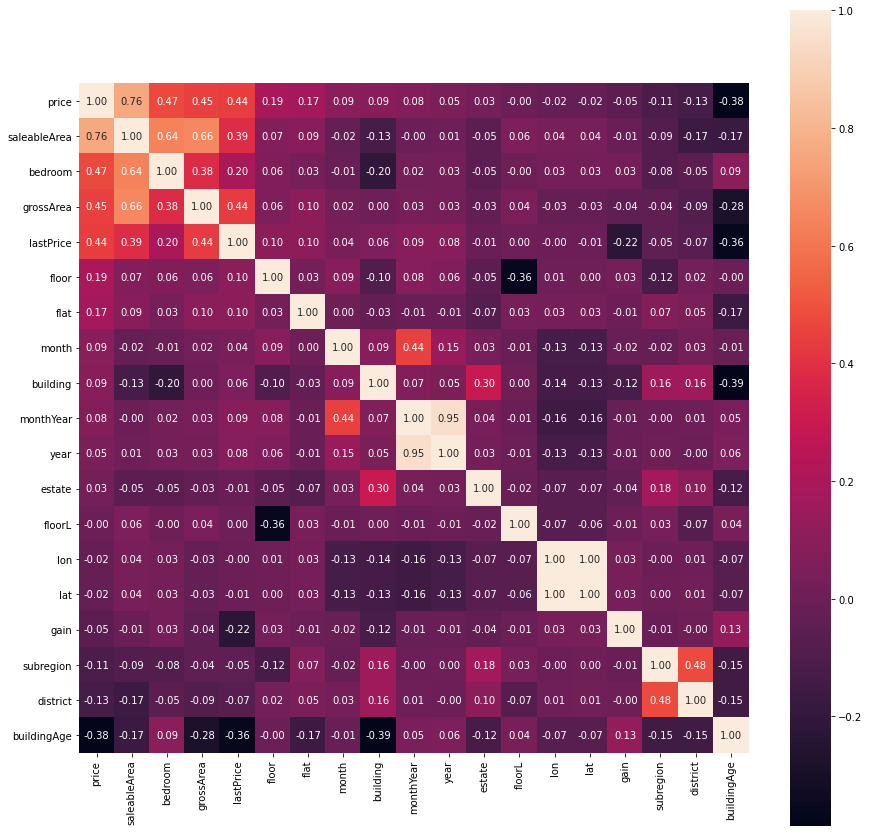

In [73]:
df = processed_df_new_territory.copy()
corrmat = df.corr()

k = 20
fig, ax = plt.subplots(figsize=(15,15)) 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

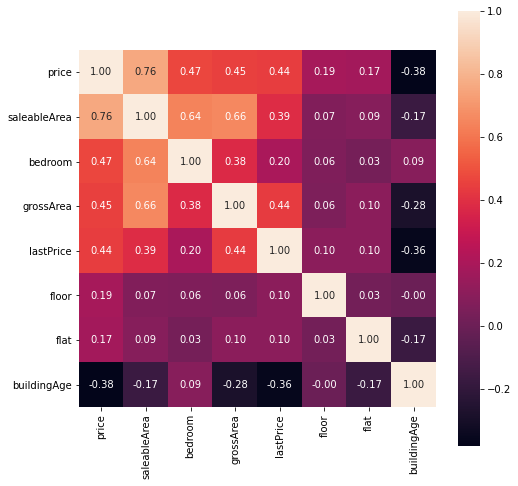

In [78]:
top_7_df = processed_df_new_territory.copy()

top_7_df = top_7_df.drop(['year', 'building', 'lat', 'lon', 'month', 'estate', 'monthYear', 'gain', 'year', 'floorL', 'district', 'subregion', 'regDate'], axis=1) 

corrmat = top_7_df.corr()

k = 8
fig, ax = plt.subplots(figsize=(8,8)) 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(top_7_df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()